In [1]:
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u011798\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u011798\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\u011798\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
from nltk.corpus import movie_reviews

categories = movie_reviews.categories()

sentences = []
targets = []

for file_id in movie_reviews.fileids():
    words = movie_reviews.words(file_id)
    sentences.append(' '.join(words))
    targets.append(categories.index(movie_reviews.categories(file_id)[0]))

# Exercice 1 - Tokenize

In [4]:
text_tokenized = [nltk.word_tokenize(text) for text in sentences]

In [5]:
print(text_tokenized[0])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '``', 'sorta', '``', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', '

In [6]:
len(text_tokenized)

2000

## Exercice 2 - Clean words from tags

In [7]:
def clean_words(word):
    return word.split('/')[0]

text_no_tags = []
for sentence in text_tokenized:
    text_no_tags.append([clean_words(word) for word in sentence])

In [8]:
print(text_no_tags[0])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '``', 'sorta', '``', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', '

## Exercice 3 - transformer les mots en miniscule

In [9]:
text_lower = []

for sentence in text_no_tags:
    text_lower.append([word.lower() for word in sentence])

In [10]:
print(text_lower[0])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '``', 'sorta', '``', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', '

## Exercice 4 - retirer la punctuation et les characteres speciaux

In [11]:
import string

print(string.punctuation)

text_no_punctuation = []

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
for sentence in text_lower:
    sentence_new = []
    for word in sentence:
        for character in string.punctuation:
            word = word.replace(character, '')
        if word != '':
            sentence_new.append(word)
    text_no_punctuation.append(sentence_new)

In [13]:
text_no_punctuation[0]

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 'drink',
 'and',
 'then',
 'drive',
 'they',
 'get',
 'into',
 'an',
 'accident',
 'one',
 'of',
 'the',
 'guys',
 'dies',
 'but',
 'his',
 'girlfriend',
 'continues',
 'to',
 'see',
 'him',
 'in',
 'her',
 'life',
 'and',
 'has',
 'nightmares',
 'what',
 's',
 'the',
 'deal',
 'watch',
 'the',
 'movie',
 'and',
 'sorta',
 'find',
 'out',
 'critique',
 'a',
 'mind',
 'fuck',
 'movie',
 'for',
 'the',
 'teen',
 'generation',
 'that',
 'touches',
 'on',
 'a',
 'very',
 'cool',
 'idea',
 'but',
 'presents',
 'it',
 'in',
 'a',
 'very',
 'bad',
 'package',
 'which',
 'is',
 'what',
 'makes',
 'this',
 'review',
 'an',
 'even',
 'harder',
 'one',
 'to',
 'write',
 'since',
 'i',
 'generally',
 'applaud',
 'films',
 'which',
 'attempt',
 'to',
 'break',
 'the',
 'mold',
 'mess',
 'with',
 'your',
 'head',
 'and',
 'such',
 'lost',
 'highway',
 'memento',
 'but',
 'there',
 'are',
 'good',
 'and',
 'bad',
 'ways',

## Exercice 5 - Remove stop words

In [14]:
from nltk.corpus import stopwords

text_no_stop_words = []


In [15]:
stoplist = stopwords.words('english')

for sentence in text_no_punctuation:
    text_no_stop_words.append([word for word in sentence if word not in stoplist])

In [37]:
print('Number of words before removing stop words: %d' %len(text_no_punctuation[0]))
print('Number of words after removing stop words: %d' %len(text_no_stop_words[0]))

print(len(text_no_stop_words[0]))

Number of words before removing stop words: 726
Number of words after removing stop words: 343
343


## Exercice 6 - Stemming

In [17]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
text_stemmed = []

In [18]:
for sentence in text_no_stop_words:
    text_stemmed.append([porter.stem(word) for word in sentence])

In [19]:
text_stemmed[0]

['plot',
 'two',
 'teen',
 'coupl',
 'go',
 'church',
 'parti',
 'drink',
 'drive',
 'get',
 'accid',
 'one',
 'guy',
 'die',
 'girlfriend',
 'continu',
 'see',
 'life',
 'nightmar',
 'deal',
 'watch',
 'movi',
 'sorta',
 'find',
 'critiqu',
 'mind',
 'fuck',
 'movi',
 'teen',
 'gener',
 'touch',
 'cool',
 'idea',
 'present',
 'bad',
 'packag',
 'make',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'sinc',
 'gener',
 'applaud',
 'film',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'way',
 'make',
 'type',
 'film',
 'folk',
 'snag',
 'one',
 'correctli',
 'seem',
 'taken',
 'pretti',
 'neat',
 'concept',
 'execut',
 'terribl',
 'problem',
 'movi',
 'well',
 'main',
 'problem',
 'simpli',
 'jumbl',
 'start',
 'normal',
 'downshift',
 'fantasi',
 'world',
 'audienc',
 'member',
 'idea',
 'go',
 'dream',
 'charact',
 'come',
 'back',
 'dead',
 'other',
 'look',
 'like',
 'dead',
 'strang',
 'apparit',
 'disappear',
 'looooot',
 'ch

## Exercice 8 - Bag of words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
clean_sentences = [' '.join(sentence) for sentence in text_stemmed]

In [22]:
from sklearn.model_selection import train_test_split

sentence_train, sentence_test, y_train, y_test = train_test_split(clean_sentences, targets, shuffle=True, test_size=0.1)

In [23]:
count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(sentence_train)
X_test = count_vectorizer.transform(sentence_test)

## Exercice 9 - Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rm_model = RandomForestClassifier()

rm_model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
preds_train = rm_model.predict(X_train)
print('Accuracy for training set is : %.4f' % (sum(y_train == preds_train)/len(preds_train)))

preds_test = rm_model.predict(X_test)
print('Accuracy for training set is : %.4f' % (sum(y_test == preds_test)/len(preds_test)))

Accuracy for training set is : 1.0000
Accuracy for training set is : 0.8050


## Exercice 10 - glove (vector representation of words)

In [27]:
## download at http://nlp.stanford.edu/data/glove.6B.zip

In [28]:
import numpy as np
from scipy import spatial

embeddings = {}
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        embeddings[word] = vector

In [29]:
def find_closer(vector, embeddings):
    return(sorted(embeddings.keys(), key=lambda word: spatial.distance.euclidean( embeddings[word], vector)))

In [30]:
find_closer(embeddings['king'] ,embeddings)

['king',
 'prince',
 'queen',
 'uncle',
 'ii',
 'grandson',
 'brother',
 'kingdom',
 'son',
 'nephew',
 'elder',
 'iv',
 'ruler',
 'cousin',
 'name',
 'monarch',
 'father',
 'grandfather',
 'reign',
 'throne',
 'iii',
 'lord',
 'henry',
 'mentioned',
 'vi',
 'edward',
 'succeeded',
 'crown',
 'homage',
 'emperor',
 'sons',
 'latter',
 'philip',
 'eldest',
 'later',
 'patron',
 'viii',
 'coronation',
 'heir',
 'brother-in-law',
 'vii',
 'frederick',
 'majesty',
 'charles',
 'mr.',
 'legend',
 'successor',
 'knight',
 'elizabeth',
 'brought',
 'empire',
 'birthplace',
 'as',
 'tribute',
 'hero',
 'assumed',
 'constantine',
 'caesar',
 'george',
 'son-in-law',
 'occasion',
 'napoleon',
 'soon',
 'great',
 'famous',
 'deposed',
 'took',
 'family',
 'once',
 'himself',
 'noble',
 'sir',
 'chose',
 'john',
 '’s',
 'proclaimed',
 'father-in-law',
 'became',
 'imperial',
 'beloved',
 'death',
 'succession',
 'refer',
 'rulers',
 'came',
 'named',
 'footsteps',
 'upon',
 'mr',
 'honour',
 'harr

In [31]:
find_closer(embeddings['sad'], embeddings)

['sad',
 'awful',
 'sorry',
 'sadly',
 'terrible',
 'feels',
 'horrible',
 'feeling',
 'hardly',
 'irony',
 'reminds',
 'tragic',
 'reminder',
 'moment',
 'frankly',
 'weird',
 'unbelievable',
 'unfortunate',
 'unfortunately',
 'terribly',
 'shocking',
 'comforting',
 'pity',
 'remember',
 'happening',
 'pathetic',
 'imagine',
 'scary',
 'happy',
 'frightening',
 'happened',
 'absolutely',
 'nowhere',
 'coincidence',
 'thing',
 'genuinely',
 'nothing',
 'happens',
 'hopeless',
 'yes',
 'shocked',
 'truly',
 'nobody',
 'heartbreaking',
 'nightmare',
 'unhappy',
 'fortunately',
 'melancholy',
 'stranger',
 'forgotten',
 'ironic',
 'thankfully',
 'definitely',
 'laments',
 'remembered',
 'lament',
 'glad',
 'feel',
 'dreadful',
 'shame',
 'miserable',
 'forget',
 'felt',
 'tired',
 'ugly',
 'everybody',
 'cry',
 'lesson',
 'seems',
 'painfully',
 'ours',
 'wonder',
 'obviously',
 'tragedy',
 'retrospect',
 'confused',
 'distressing',
 'remembering',
 'worse',
 'sorrowful',
 '…',
 'knowing

## Linear algebra with words

In [32]:
vector = embeddings['king'] - embeddings['man'] + embeddings['woman']
find_closer(vector, embeddings)

['king',
 'queen',
 'prince',
 'elizabeth',
 'daughter',
 'widow',
 'throne',
 'monarch',
 'cousin',
 'eldest',
 'princess',
 'kingdom',
 'father',
 'grandson',
 'granddaughter',
 'elder',
 'grandfather',
 'uncle',
 'niece',
 'son',
 'family',
 'mother',
 'grandmother',
 'birth',
 'wife',
 'consort',
 'bride',
 'aunt',
 'sister',
 'lady',
 'marry',
 'wedding',
 'marriage',
 'name',
 'nephew',
 'brother',
 'margaret',
 'mary',
 'coronation',
 'granted',
 'marrying',
 'death',
 'daughters',
 'majesty',
 'ii',
 'mistress',
 'accompanied',
 'homage',
 'diana',
 'patron',
 'heir',
 'funeral',
 'caroline',
 'isabella',
 'sister-in-law',
 'deceased',
 'frederick',
 'exile',
 'blessing',
 'sons',
 'mentioned',
 'marries',
 'footsteps',
 'wishes',
 'visited',
 'father-in-law',
 'camilla',
 'brother-in-law',
 'iv',
 'married',
 'husband',
 'bohemia',
 'latter',
 '’s',
 'beloved',
 'viii',
 'chose',
 'birthplace',
 'crown',
 'occasion',
 'thereafter',
 'betrothed',
 'tribute',
 'grandparents',
 '

## Visualize

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.manifold import TSNE

def plot_words(word1, word2, embeddings, n=100):
    words_1 = find_closer(embeddings[word1],embeddings)
    words_2 = find_closer(embeddings[word2], embeddings)
    words1 = words_1[:n]
    words2 = words_2[:n]
    
    words1.extend(words2)

    vectors = []
    for word in words1:
        vectors.append(embeddings[word])

    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(vectors)
    tsne_df = pd.DataFrame({'X': tsne_result[:,0], 'Y': tsne_result[:,1], 'word_similarity': [word1]*n+[word2]*n})

    sns.lmplot('X', 'Y', tsne_df, hue='word_similarity', fit_reg=False)
    plt.annotate(word1, (tsne_result[words1.index(word1), 0], tsne_result[words1.index(word1), 1]))
    plt.annotate(word2, (tsne_result[words1.index(word2), 0], tsne_result[words1.index(word2), 1]))

    plt.show()

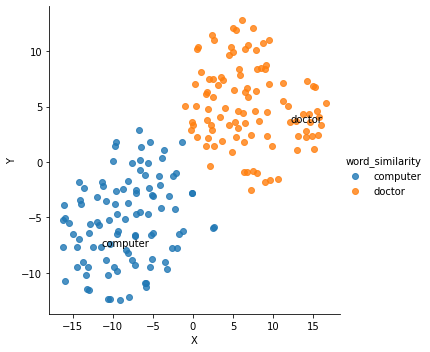

In [34]:
plot_words('computer', 'doctor', embeddings)

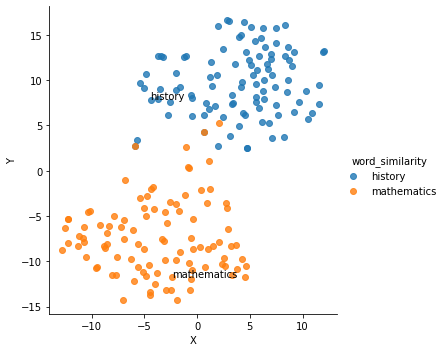

In [35]:
plot_words('history', 'mathematics', embeddings)

## Exercice 11 - Try your visualization